# 📊 Початковий аналіз даних

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
df = pd.read_csv("crop_yield_data.csv")

# Перейменування колонок на українські
df = df.rename(columns={
    "rainfall_mm": "Опади (мм)",
    "soil_quality_index": "Індекс якості ґрунту",
    "farm_size_hectares": "Розмір ферми (га)",
    "sunlight_hours": "Сонячні години",
    "fertilizer_kg": "Добрива (кг)",
    "crop_yield": "Урожайність"
})

# Перші 5 рядків
df.head()



,Опади (мм),Індекс якості ґрунту,Розмір ферми (га),Сонячні години,Добрива (кг),Урожайність
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


## ℹ️ Інформація про датасет

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Опади (мм)            3000 non-null   int64
 1   Індекс якості ґрунту  3000 non-null   int64
 2   Розмір ферми (га)     3000 non-null   int64
 3   Сонячні години        3000 non-null   int64
 4   Добрива (кг)          3000 non-null   int64
 5   Урожайність           3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


## 📊 Розподіл числових ознак (гістограми)


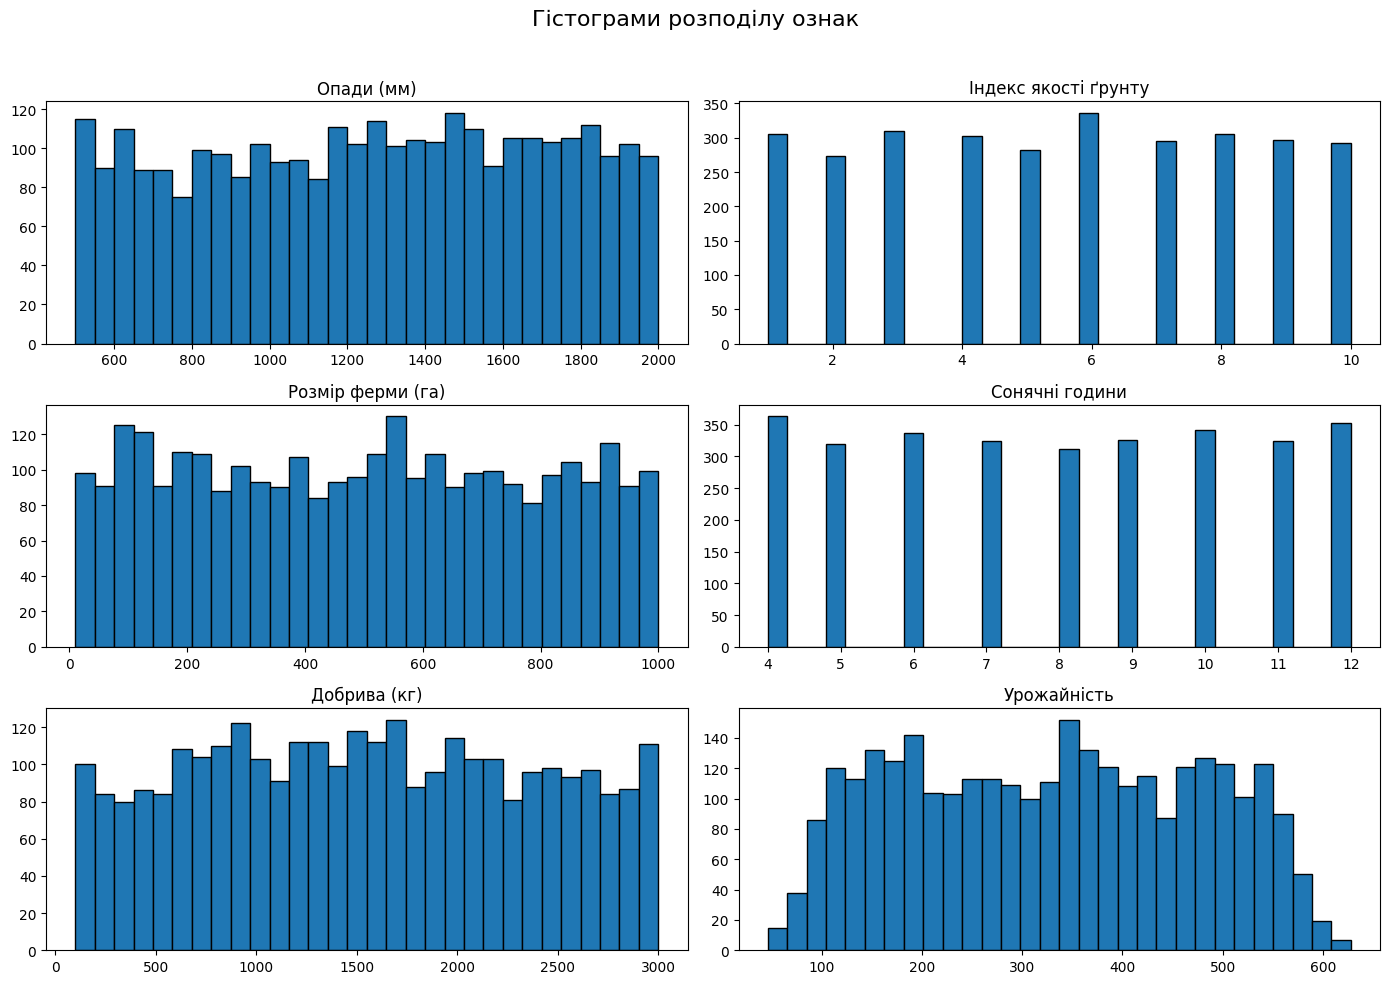

In [55]:
# Побудова гістограм розподілу ознак
df.hist(bins=30, figsize=(14, 10), edgecolor='black', grid=False)
plt.suptitle("Гістограми розподілу ознак", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## 📦 Boxplot-аналіз ознак (розподіл + викиди)


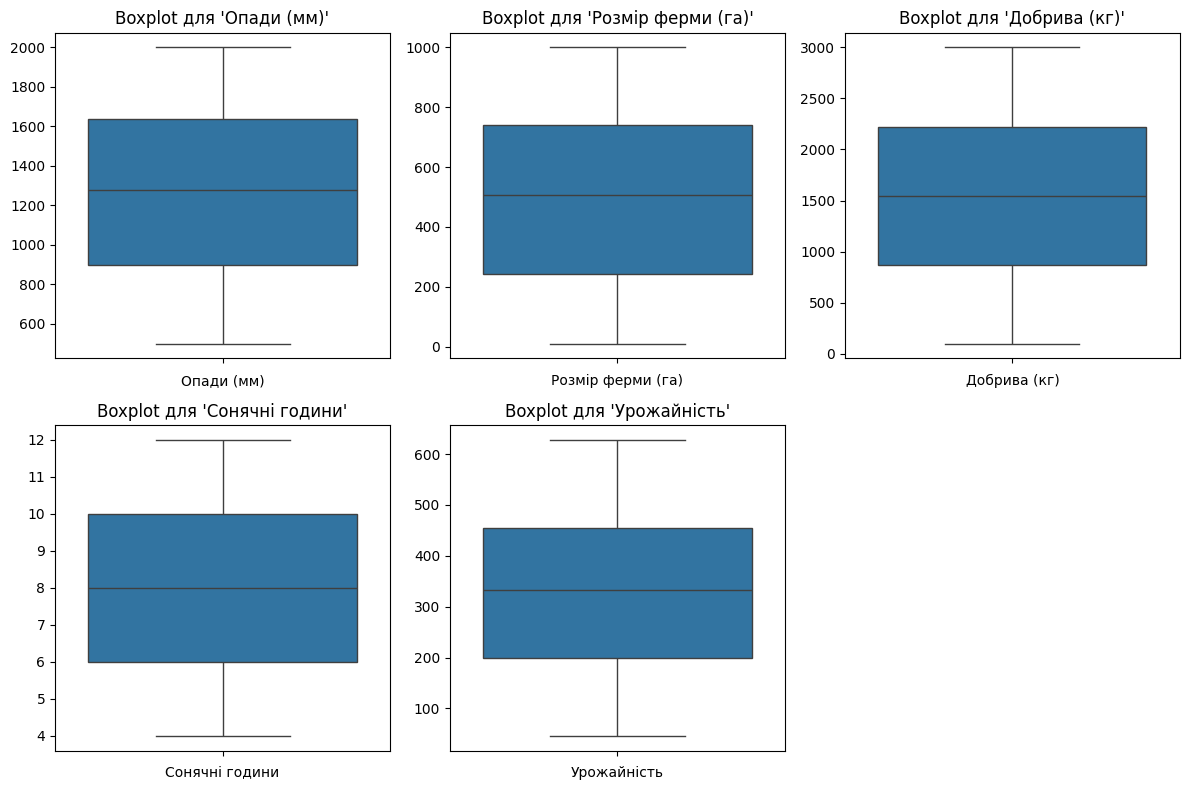

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Список кількісних ознак
numeric_columns = ["Опади (мм)", "Розмір ферми (га)", "Добрива (кг)", "Сонячні години", "Урожайність"]

# Побудова boxplot-ів
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f"Boxplot для '{column}'")
    plt.ylabel("")
    plt.xlabel(column)

plt.tight_layout()
plt.show()



## 📈 Аналіз викидів методом IQR

In [62]:
# Аналіз викидів методом IQR 5. Вибір моделі (Algorithm selection)
print("🔎 Аналіз викидів:")

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    total = df.shape[0]

    print(f"▪️ {column}: {outlier_count} викидів із {total} ({(outlier_count / total) * 100:.1f}%)")


🔎 Аналіз викидів:
▪️ Опади (мм): 0 викидів із 3000 (0.0%)
▪️ Розмір ферми (га): 0 викидів із 3000 (0.0%)
▪️ Добрива (кг): 0 викидів із 3000 (0.0%)
▪️ Сонячні години: 0 викидів із 3000 (0.0%)
▪️ Урожайність: 0 викидів із 3000 (0.0%)


## 🔗 Кореляційна матриця

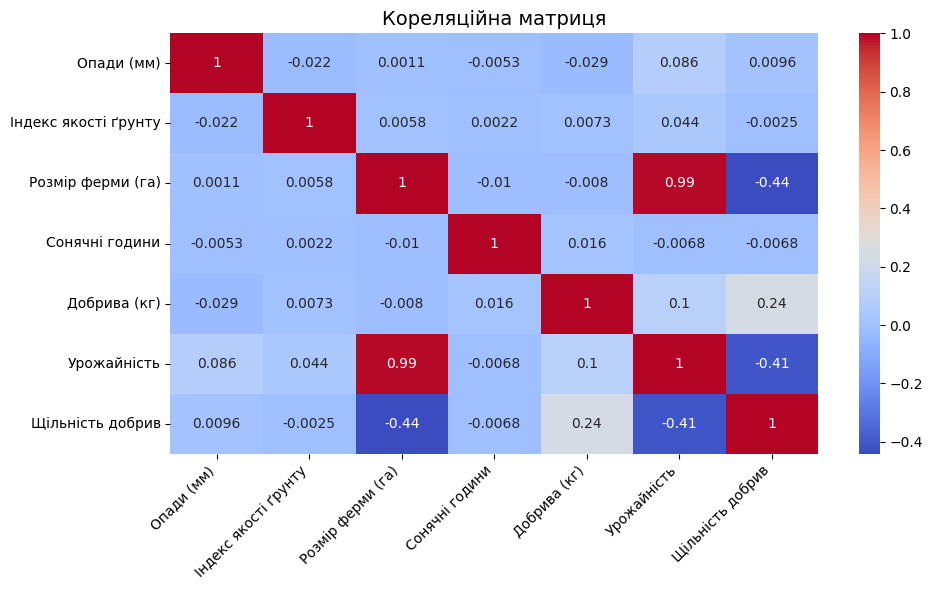

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Кореляційна матриця", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## 🔗 Парні залежності між числовими ознаками (Pairplot)


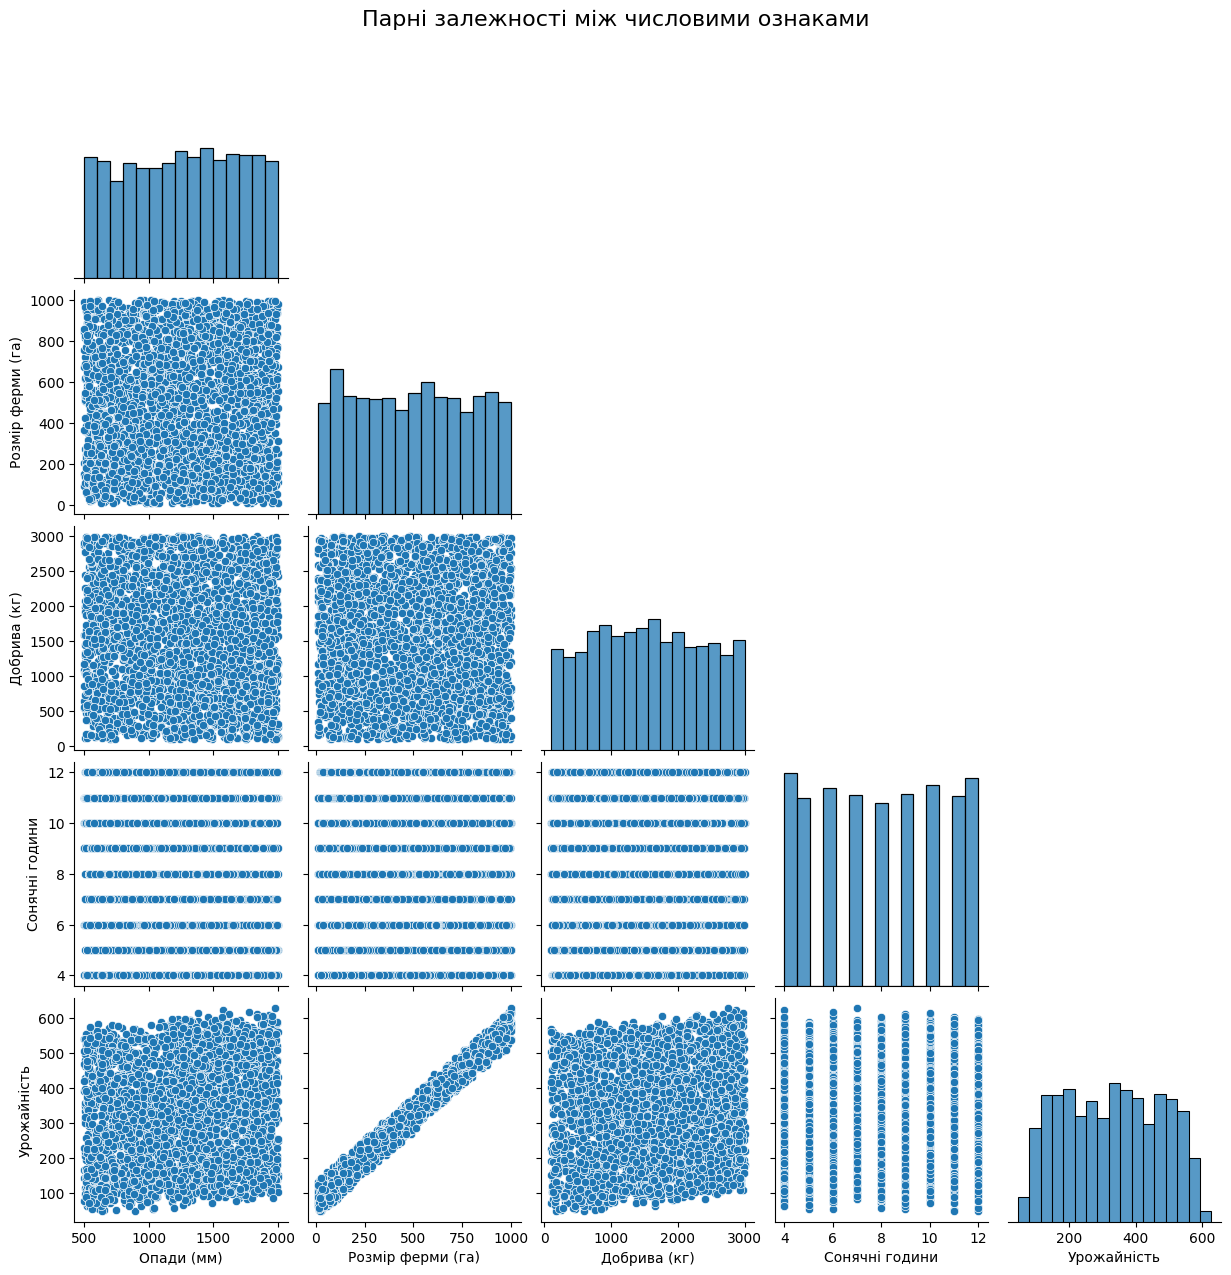

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова pairplot (парних залежностей)
sns.pairplot(df[numeric_columns], corner=True)
plt.suptitle("Парні залежності між числовими ознаками", y=1.02, fontsize=16)
plt.show()

## 📈 Feature vs Target (Scatter plots)

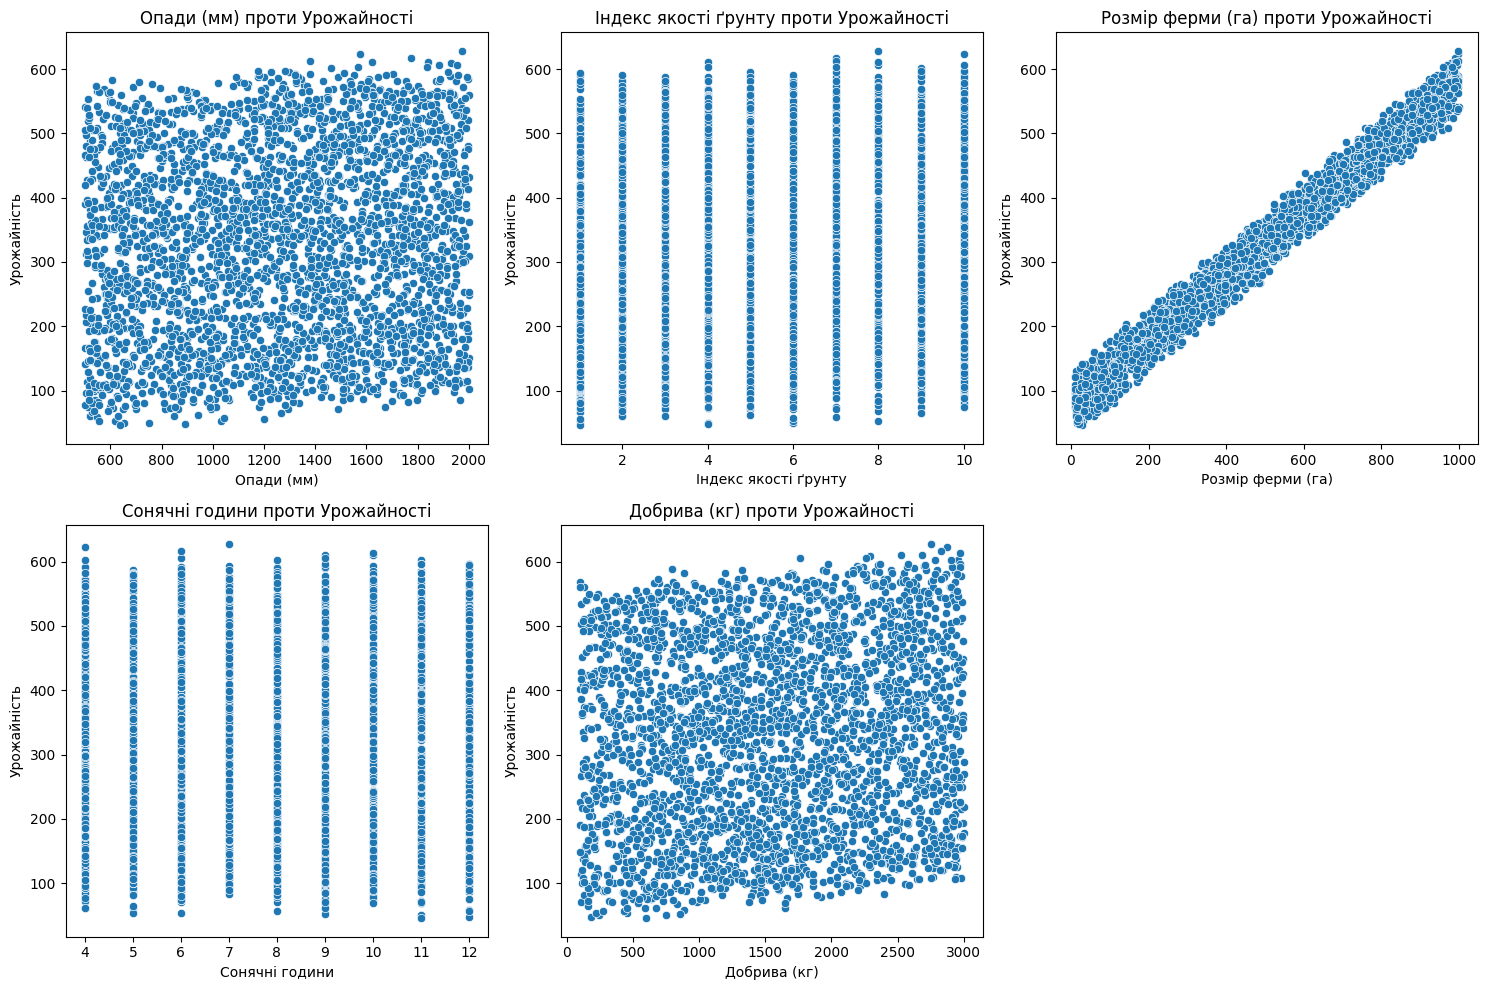

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Графік залежності кожної фічі від Урожайності
features = ["Опади (мм)", "Індекс якості ґрунту", "Розмір ферми (га)", "Сонячні години", "Добрива (кг)"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=feature, y="Урожайність")
    plt.title(f"{feature} проти Урожайності")
    plt.xlabel(feature)
    plt.ylabel("Урожайність")

plt.tight_layout()
plt.show()



## 📊 Bar chart (середнє значення таргету по категоріях)

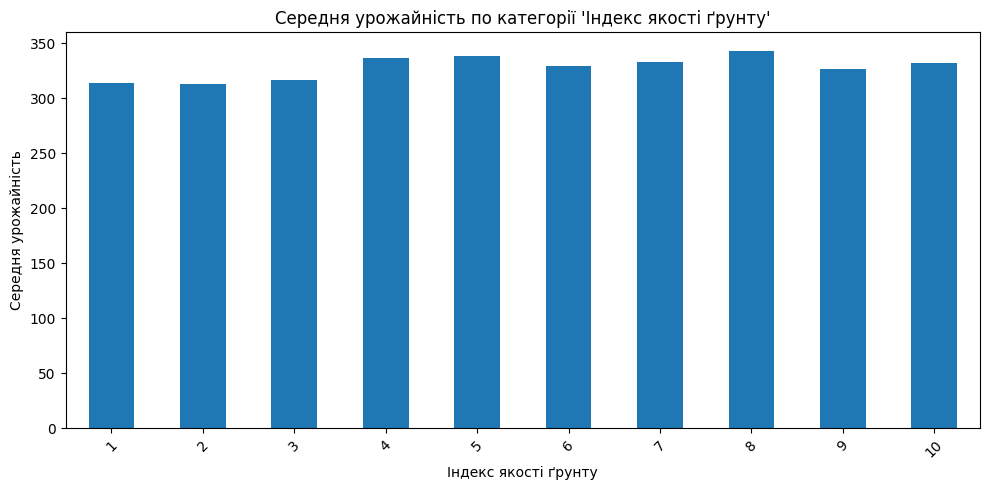

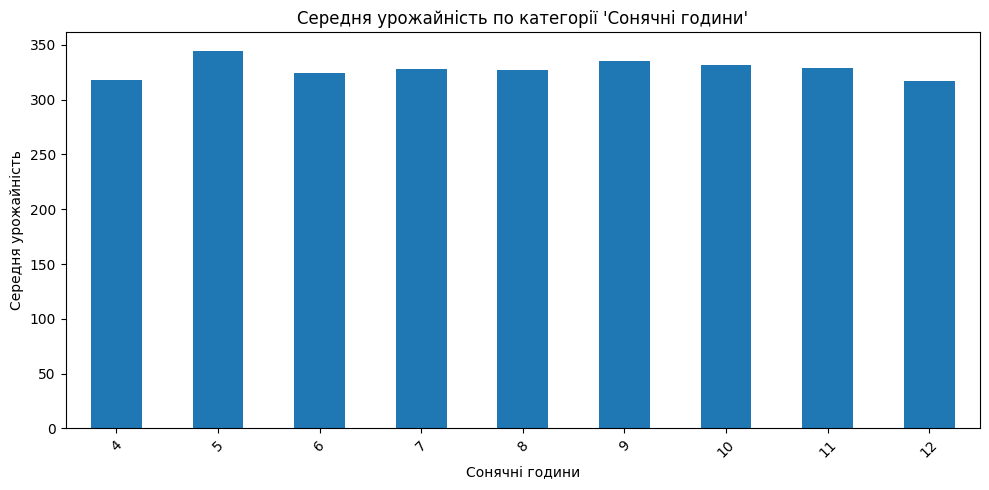

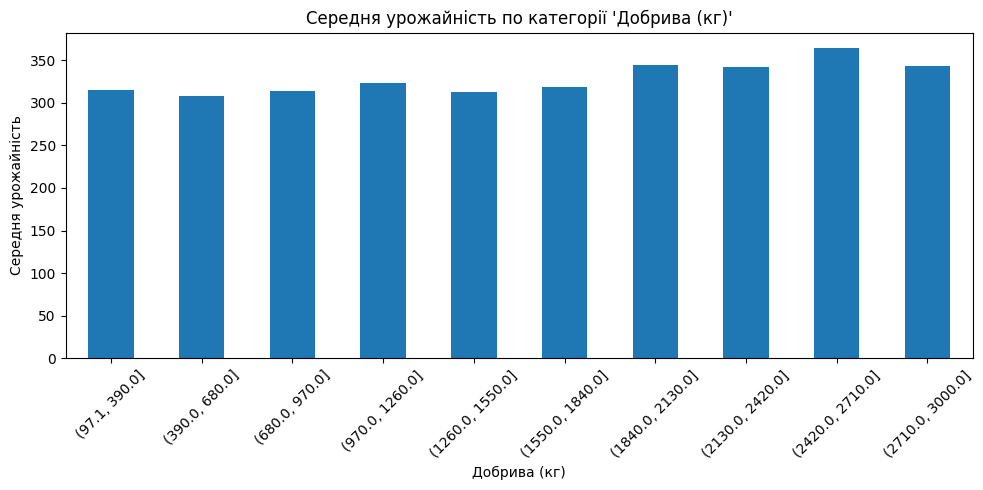

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔹 Категоріальні фічі (українською)
categorical_features = {
    "Індекс якості ґрунту": "Індекс якості ґрунту",
    "Сонячні години": "Сонячні години"
}

# 🔹 Бінінг для "Добрива (кг)"
df["Інтервал добрив (кг)"] = pd.cut(df["Добрива (кг)"], bins=10)
categorical_features["Інтервал добрив (кг)"] = "Добрива (кг)"

# 🔹 Побудова графіків
for column, label in categorical_features.items():
    df.groupby(column, observed=True)["Урожайність"].mean().plot(kind="bar", figsize=(10, 5))
    plt.ylabel("Середня урожайність")
    plt.xlabel(label)
    plt.title(f"Середня урожайність по категорії '{label}'")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




 ## 🧠 Лінійна регресія зі sklearn
 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Вибір ознак і цільової змінної
X = df.drop("Урожайність", axis=1)
y = df["Урожайність"]

# Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель
model = LinearRegression()
model.fit(X_train, y_train)

# Прогноз
y_pred = model.predict(X_test)

# Оцінка
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Таблиця з метриками
import pandas as pd
metrics_table = pd.DataFrame({
    'Метрика': ['RMSE', 'MAE', 'R²'],
    'Значення': [rmse, mae, r2]
})
print(metrics_table)

  Метрика  Значення
0    RMSE  0.285938
1     MAE  0.243195
2      R²  0.999996


 ## 🧩 Інженерія ознак (Feature Engineering)
 

In [60]:
# Приклад: створимо нову фічу — щільність добрив (добрива на 1 га)
df["Щільність добрив"] = df["Добрива (кг)"] / (df["Розмір ферми (га)"] + 1)  # +1 щоб уникнути ділення на 0


 ## 🔄 Масштабування ознак (нормалізація / стандартизація)
 

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 ## 🧠 Важливість ознак (Feature Importance)
 

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

importance_table = pd.DataFrame({
    'Ознака': X.columns,
    'Коефіцієнт': model.coef_
}).sort_values(by='Коефіцієнт', ascending=False)

display(importance_table)



,Ознака,Коефіцієнт
1,Індекс якості ґрунту,2.001967
2,Розмір ферми (га),0.499991
3,Сонячні години,0.094461
0,Опади (мм),0.029979
4,Добрива (кг),0.020002


 ## 🧠 Моделі з бібліотеки sklearn
 

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "KNN": KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R²: {r2:.4f}")


Decision Tree R²: 0.9936
Random Forest R²: 0.9983
Support Vector Regressor R²: 0.7070
KNN R²: 0.9860


 ## 5. Вибір моделі (Algorithm selection)
 
 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

models = {
    "Дерево рішень": DecisionTreeRegressor(),
    "Випадковий ліс": RandomForestRegressor(),
    "Метод опорних векторів": SVR(),
    "K найближчих сусідів": KNeighborsRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append((name, r2))

# Виведемо результати у вигляді таблиці
import pandas as pd
results_df = pd.DataFrame(results, columns=["Модель", "R²"])
print(results_df.sort_values(by="R²", ascending=False)) 

                   Модель        R²
1          Випадковий ліс  0.998310
0           Дерево рішень  0.993831
3    K найближчих сусідів  0.985996
2  Метод опорних векторів  0.706992


 ## 📊 6. Оцінка результатів моделі (Results Evaluation)
 ✅ a. Поділ на Train/Test
 
 

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ## ✅ b. Метрики оцінки моделі: RMSE, MAE, R²
 
 

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📏 RMSE: {rmse:.4f}")
print(f"📏 MAE: {mae:.4f}")
print(f"📈 R²: {r2:.4f}")


📏 RMSE: 0.2859
📏 MAE: 0.2432
📈 R²: 1.0000


 ## ✅ c. Важливість ознак (Feature Importance)
 
 

In [76]:
importance_table = pd.DataFrame({
    'Ознака': X.columns,
    'Коефіцієнт': model.coef_
}).sort_values(by='Коефіцієнт', ascending=False)

display(importance_table)


,Ознака,Коефіцієнт
1,Індекс якості ґрунту,2.001967
2,Розмір ферми (га),0.499991
3,Сонячні години,0.094461
0,Опади (мм),0.029979
4,Добрива (кг),0.020002


 ## 📊 Також побудовано графік важливості ознак:
 
 

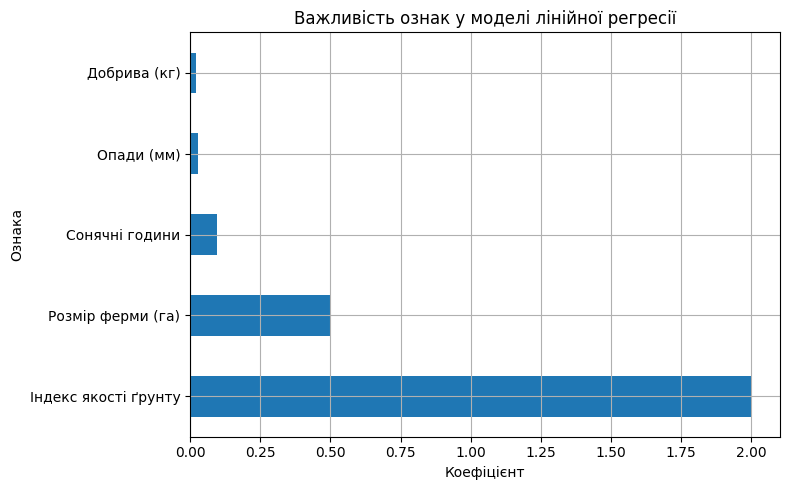

In [77]:
importance_table.set_index("Ознака").plot(kind="barh", figsize=(8, 5), legend=False)
plt.title("Важливість ознак у моделі лінійної регресії")
plt.xlabel("Коефіцієнт")
plt.grid(True)
plt.tight_layout()
plt.show()
